In [80]:
import yfinance as yf

In [81]:
data=yf.download('TCS.NS',start='2021-01-01',end='2023-07-12')
data=data[['Open','High','Low','Close','Volume']]
ma = data['Close'].rolling(window=20).mean()
std = data['Close'].rolling(window=20).std()
data['bb_upper'] = ma + 2 * std
data['bb_lower'] = ma - 2 * std
data['bb_width'] = data['bb_upper'] - data['bb_lower']

[*********************100%***********************]  1 of 1 completed


In [82]:
data.dropna(inplace=True)
print(data[:5])

Price              Open         High          Low        Close   Volume  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS   
Date                                                                      
2021-01-29  3027.715254  3034.129052  2923.916184  2934.621582  5445659   
2021-02-01  2923.916526  2985.224453  2871.191801  2961.031494  3985846   
2021-02-02  2993.713075  3040.873016  2971.076303  3021.490234  2881837   
2021-02-03  3030.497581  3052.191152  2983.007432  3018.283203  2505866   
2021-02-04  3033.374911  3053.936694  2995.599749  3007.342529  2057261   

Price          bb_upper     bb_lower    bb_width  
Ticker                                            
Date                                              
2021-01-29  3195.587473  2787.678250  407.909223  
2021-02-01  3174.283272  2829.417973  344.865298  
2021-02-02  3169.196514  2850.517719  318.678795  
2021-02-03  3167.692299  2862.672984  305.019316  
2021-02-04  3159.055439  2884.773663  274.

In [83]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [84]:
print(scaled_data[:5])

[[0.24822546 0.22598508 0.19368148 0.18693668 0.4475576  0.260997
  0.10234208 0.5300317 ]
 [0.1520554  0.17946037 0.14446925 0.21105226 0.32154276 0.23710028
  0.15083677 0.41474402]
 [0.21672227 0.23240086 0.23770009 0.2662587  0.22624184 0.23139451
  0.1753512  0.36685707]
 [0.2508033  0.24316821 0.24883644 0.26333028 0.19378705 0.22970724
  0.18947361 0.34187814]
 [0.25346916 0.24482881 0.26058994 0.25334007 0.15506231 0.22001936
  0.21515096 0.28566877]]


In [85]:
prior_days=40
x,y=[],[]
for i in range(prior_days,len(scaled_data)):
    x.append(scaled_data[i-prior_days:i])
    y.append(scaled_data[i,3])
x,y=np.array(x),np.array(y)

In [86]:
split=int(0.70*len(x))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [87]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_absolute_error

In [88]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(x.shape[1],x.shape[2])))
model.add(LSTM(units=70))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20,batch_size=8)

D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0649
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0079
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0066
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0072
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0056
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0044
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0048
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0044
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0035
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0046
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0035
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0030
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0028
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0053
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0030
Epo

In [89]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((predicted_prices.shape[0], 3)),
                    predicted_prices,
                    np.zeros((predicted_prices.shape[0], 4))], axis=1)
)[:, 3]


real_prices = data['Close'].values[prior_days + split:]

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


In [90]:
real_prices = real_prices.reshape(-1)
predicted_prices = predicted_prices.reshape(-1)
mae = mean_absolute_error(real_prices, predicted_prices)
print(f"MAE: {mae:.4f}")

MAE: 33.9958


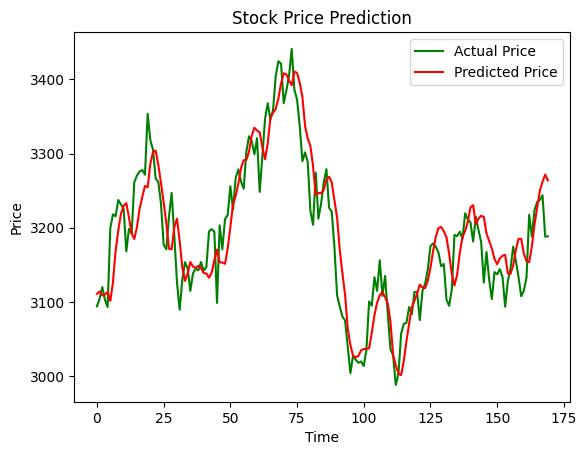

In [91]:
import matplotlib.pyplot as plt

plt.plot(real_prices, color='green', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()